# Average occupancy rate by vehicle

## Source
**Analysis and Scenario Development in Uganda’s Transport Sector.**
* Table 4-3: Passenger-km by Vehicle Type

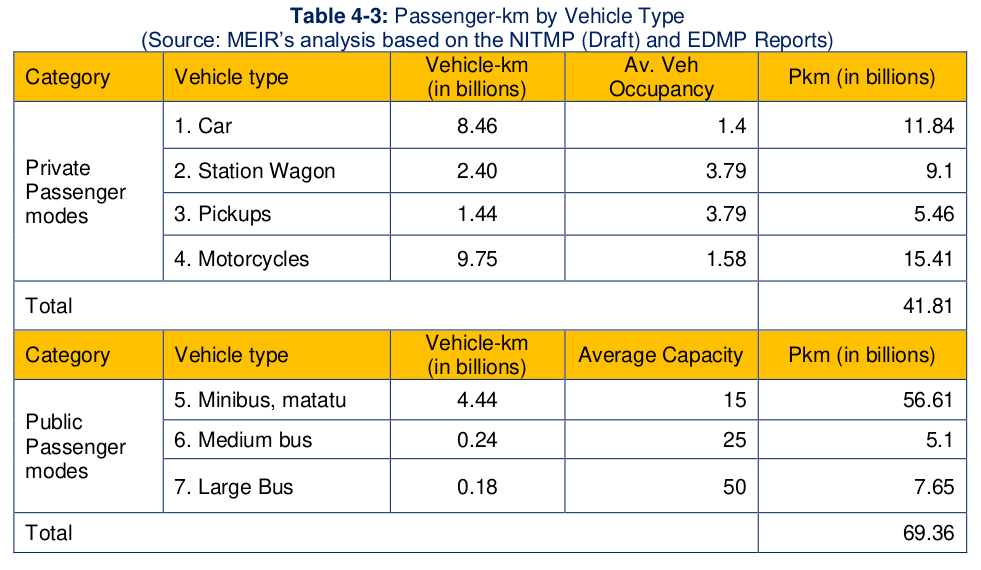

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import EDAUtils

# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

edau = EDAUtils()


In [2]:
# Average occupancy rate data from table 4-3
avg_occ_rate = {"car" : 1.4,
                "station_wagon" : 3.79,
                "pickups" : 3.79,
                "motorcyles" : 1.58,
                "minubus_matatu" : 15.0,
                "medium_bus" : 25.0,
                "large_bus" : 50.0,
                }

Sisepuede schema:
* Variable : Average Passenger Vehicle Occupancy Rate
* occrate_trns_passenger_per_vehicle_$CAT-TRANSPORTATION$
* Cat : aviation``|``human_powered``|``powered_bikes``|``public``|``rail_passenger``|``road_heavy_regional``|``road_light``|``water_borne

In [3]:
## Crosswalk ssp categories-Analysis and Scenario Development in Uganda’s Transport Sector categories
ssp_cw = {
    "occrate_trns_passenger_per_vehicle_public" : ["minubus_matatu", "medium_bus", "large_bus"],
    "occrate_trns_passenger_per_vehicle_road_light" : ["car"]
}

In [4]:
## Compute average value between categories
ssp_cat_avg = {ssp_cat : [np.mean([avg_occ_rate[cat] for cat in ssp_cat_cw])] 
               for ssp_cat, ssp_cat_cw in ssp_cw.items()}

## We assume the data starts from the publication year of Analysis and Scenario Development in Uganda’s Transport Sector categories (2021)
## Since we have no additional information, let's assume the values are constant until the year 2100
df_years = pd.DataFrame({"year" : range(2021,2101)})

## Create pd.DataFrame
df_avg_occ_rate = pd.DataFrame(ssp_cat_avg)

## Merge dataframes
df_avg_occ_rate = df_years.merge(right=df_avg_occ_rate, how="cross")
df_avg_occ_rate

,year,occrate_trns_passenger_per_vehicle_public,occrate_trns_passenger_per_vehicle_road_light
0,2021,30.0,1.4
1,2022,30.0,1.4
2,2023,30.0,1.4
3,2024,30.0,1.4
4,2025,30.0,1.4
...,...,...,...
75,2096,30.0,1.4
76,2097,30.0,1.4
77,2098,30.0,1.4
78,2099,30.0,1.4


## Validation

In [5]:
# Load global data
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df[ssp_cw.keys()].head()

,occrate_trns_passenger_per_vehicle_public,occrate_trns_passenger_per_vehicle_road_light
0,78.346714,1.6808
1,78.346714,1.6808
2,78.346714,1.6808
3,78.346714,1.6808
4,78.346714,1.6808


Comparing occrate_trns_passenger_per_vehicle_public...


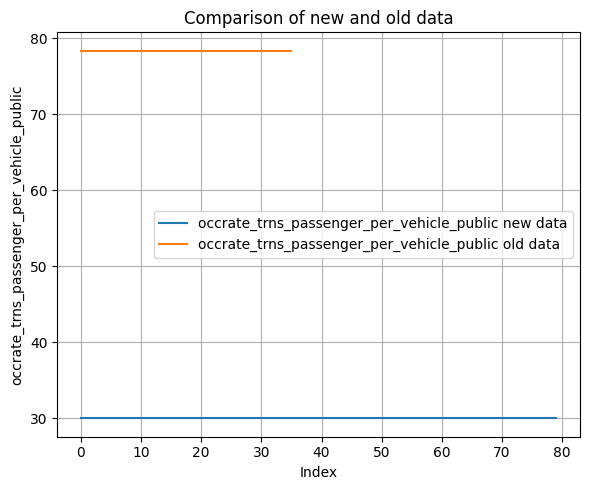

Comparing occrate_trns_passenger_per_vehicle_road_light...


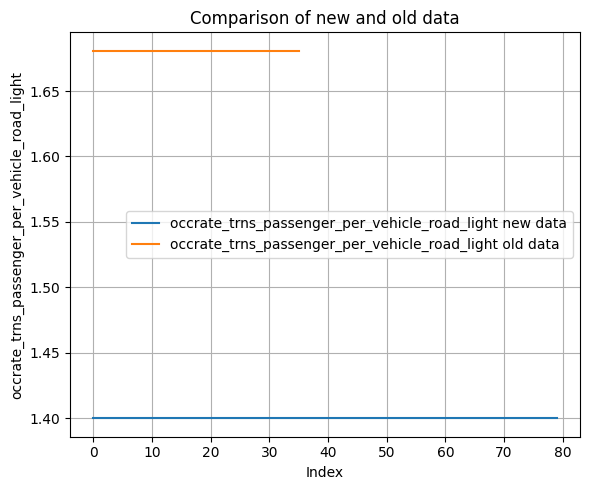

In [6]:
for col in df_avg_occ_rate.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(df_avg_occ_rate, uga_global_df, [col])

## Save

In [7]:
df_avg_occ_rate.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "occrate_trns_passenger_per_vehicle.csv"), index=False)